# Introduction to the BDD100K Dataset

## Overview
The BDD100K (Berkeley DeepDrive 100K) dataset is one of the most comprehensive and diverse driving datasets available for computer vision research in autonomous driving. Created by UC Berkeley's DeepDrive lab, this large-scale dataset contains 100,000 videos with diverse driving scenarios captured across different locations, weather conditions, and times of day.

## Dataset Origin and Purpose
- **Development**: Created by Berkeley DeepDrive (BDD) in 2018
- **Purpose**: To advance research in autonomous driving and traffic scene understanding
- **Collection**: Collected from diverse locations in the United States (New York, San Francisco Bay Area, etc.)
- **Funding**: Supported by multiple industry partners in the autonomous vehicle space

## Dataset Structure
The BDD100K dataset is organized into several components:

### 1. Video Data
- 100,000 high-resolution (1280×720) videos
- 40 seconds per video at 30fps (approximately 1,200 frames per video)
- Total duration: ~1,100 hours of driving footage

### 2. Annotations
The dataset includes multiple annotation types across different subsets:

#### a. Image-Level Annotations (100K images)
- Weather conditions (rainy, snowy, cloudy, etc.)
- Scene type (highway, residential, parking lot, etc.)
- Time of day (daytime, night, dawn/dusk)

#### b. Object Detection (100K images)
- 2D bounding boxes for:
  - Vehicles (cars, trucks, buses)
  - Pedestrians
  - Traffic signs/lights
  - Bicycles
  - Motorcycles
  - Other road objects
- Total of over 1.8 million labeled objects

### 3. Data Splits
The dataset is divided into:
- **Training set**: 70,000 images
- **Validation set**: 10,000 images
- **Test set**: 20,000 images

## Key Features and Strengths

### 1. Diversity
- **Geographic diversity**: Captured across multiple US cities
- **Weather diversity**: Includes various weather conditions (sunny, rainy, foggy, snowy)
- **Time diversity**: Daytime, night, dawn, and dusk scenarios
- **Scene diversity**: Urban, rural, and highway environments

### 2. Comprehensive Annotations
- Multiple annotation types (detection, segmentation, tracking) in a single dataset
- High-quality manual annotations with quality control

### 3. Balanced Distribution
- Careful balancing across different conditions to prevent bias

## Dataset Statistics

| Category | Count |
|----------|-------|
| Annotated images | 100,000 |
| Labeled objects | >1.8 million |
| Weather conditions | 4 (rainy, snowy, cloudy, clear) |
| Scene types | 6 (highway, city street, etc.) |
| Time of day | 3 (day, night, dawn/dusk) |

## Potential Use Cases in Our Project
1. **Object Detection**: Training models to detect vehicles, pedestrians, and traffic signs
2. **Semantic Segmentation**: Understanding drivable areas and road layouts
3. **Behavior Prediction**: Analyzing driver behavior and traffic patterns

## Access and Usage
The dataset is available for non-commercial research purposes through the Berkeley DeepDrive website. Users must agree to the terms of use before downloading.

## Working with the 10K Object Detection Set
For our project, we used the **10K version** of the dataset—specifically the object detection subset consisting of 10,000 annotated images. This reduced version was chosen to ensure efficient processing and analysis within our available computational resources and time constraints, while still retaining sufficient diversity and annotation quality for meaningful model training and evaluation.

## References
- Original paper: "BDD100K: A Diverse Driving Dataset for Heterogeneous Multitask Learning" (Yu et al., 2020)
- Official website: https://bdd-data.berkeley.edu/
- GitHub repository: https://github.com/ucbdrive/bdd100k

This comprehensive dataset provides an excellent foundation for our project, offering rich, diverse, and well-annotated data that can help develop robust computer vision models for autonomous driving applications.

In [ ]:
'''
from google.colab import drive
drive.flush_and_unmount()
'''

'\nfrom google.colab import drive\ndrive.flush_and_unmount()\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
os.listdir("/content/drive/MyDrive/Data")

['Images', 'labels', 'augmented', 'custom.yaml', 'augment.yaml', 'yolov11s.pt']

## Data Exploration:

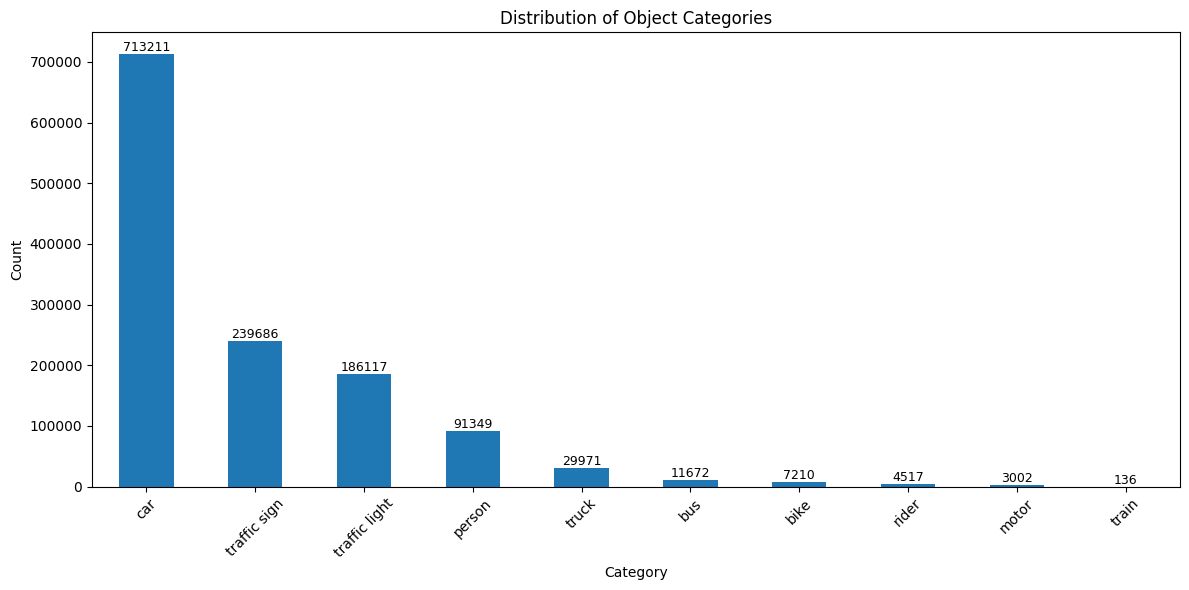

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Load the JSON annotations
with open("/content/drive/MyDrive/Data/labels/bdd100k_labels_images_train.json") as f:
    data = json.load(f)

# Prepare lists for object categories and bounding box centers
categories = []
bbox_centers = []

for entry in data:
    for label in entry["labels"]:
        category = label["category"]
        # Only consider objects with box2d annotations
        if "box2d" in label:
            box = label["box2d"]
            x_center = (box["x1"] + box["x2"]) / 2
            y_center = (box["y1"] + box["y2"]) / 2

            categories.append(category)
            bbox_centers.append((x_center, y_center))

# Create a DataFrame
df = pd.DataFrame(bbox_centers, columns=["x_center", "y_center"])
df["category"] = categories

# Plot 1: Distribution of object categories
plt.figure(figsize=(12, 6))
category_counts = df['category'].value_counts()
ax = category_counts.plot(kind='bar')

plt.title("Distribution of Object Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Annotate each bar with the count
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Plot 2: Spatial heatmap of object positions
#plt.figure(figsize=(10, 8))
#sns.kdeplot(
#    x=df["x_center"],
#    y=df["y_center"],
#    cmap="viridis",
#    fill=True,
#    bw_adjust=0.5
#)
#plt.title("Spatial Distribution of Object Centers (All Categories)")
#plt.xlabel("x_center")
#plt.ylabel("y_center")
#plt.gca().invert_yaxis()  # Invert Y for image-style coordinate system
#plt.tight_layout()
#plt.show()


-> Noting that there is a great bias towards certain classes like (cars, traffic lights and traffic signs) wich can be fixed by applying oversampling to the minority classes.

## Investigate the quality of the data (image resolution, label accuracy):

### Image resolution:

In [ ]:
from PIL import Image
import os

def check_image_resolutions(image_dirs):
    resolutions = {}
    for dir_path in image_dirs:
        for filename in os.listdir(dir_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(dir_path, filename)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        resolutions[filename] = (width, height)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")
    return resolutions

# Example usage
image_dirs = [
    "/content/drive/MyDrive/Data/Images/train",
    "/content/drive/MyDrive/Data/Images/val"
]

resolutions = check_image_resolutions(image_dirs)

   width  height  count
0   1280     720  15018


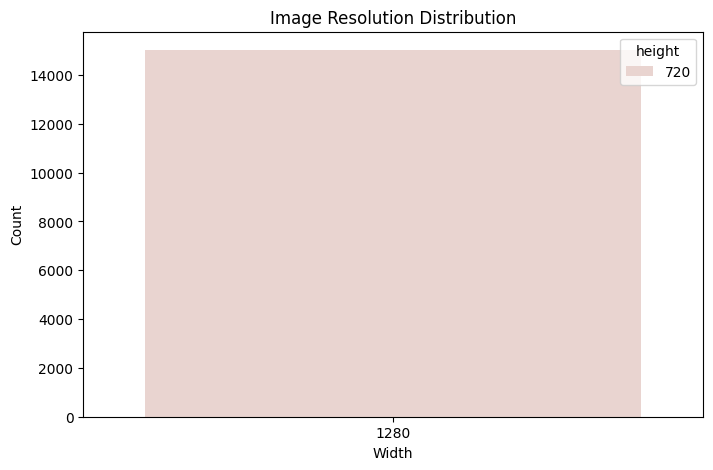

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_res = pd.DataFrame(resolutions.values(), columns=["width", "height"])
summary = df_res.value_counts().reset_index(name="count")
print(summary)

plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x="width", y="count", hue="height")
plt.title("Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Count")
plt.show()

### Corrupted Images visualization & removal

In [ ]:
'''
import shutil

def visualize_vertical_images(image_dirs, cols=3):
    vertical_images = []

    for dir_path in image_dirs:
        for filename in os.listdir(dir_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(dir_path, filename)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        if width == 720 and height == 1280:
                            vertical_images.append((filename, img.copy()))
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")

    # Visualization
    rows = (len(vertical_images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))

    for i, (filename, img) in enumerate(vertical_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(filename)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

from PIL import Image
import os
import shutil
'''


In [ ]:
'''
image_dirs = [
    "Data/Images/train",
    "Data/Images/val"
]
visualize_vertical_images(image_dirs)
'''

'\nimage_dirs = [\n    "Data/Images/train",\n    "Data/Images/val"\n]\nvisualize_vertical_images(image_dirs)\n'

### label accuracy:

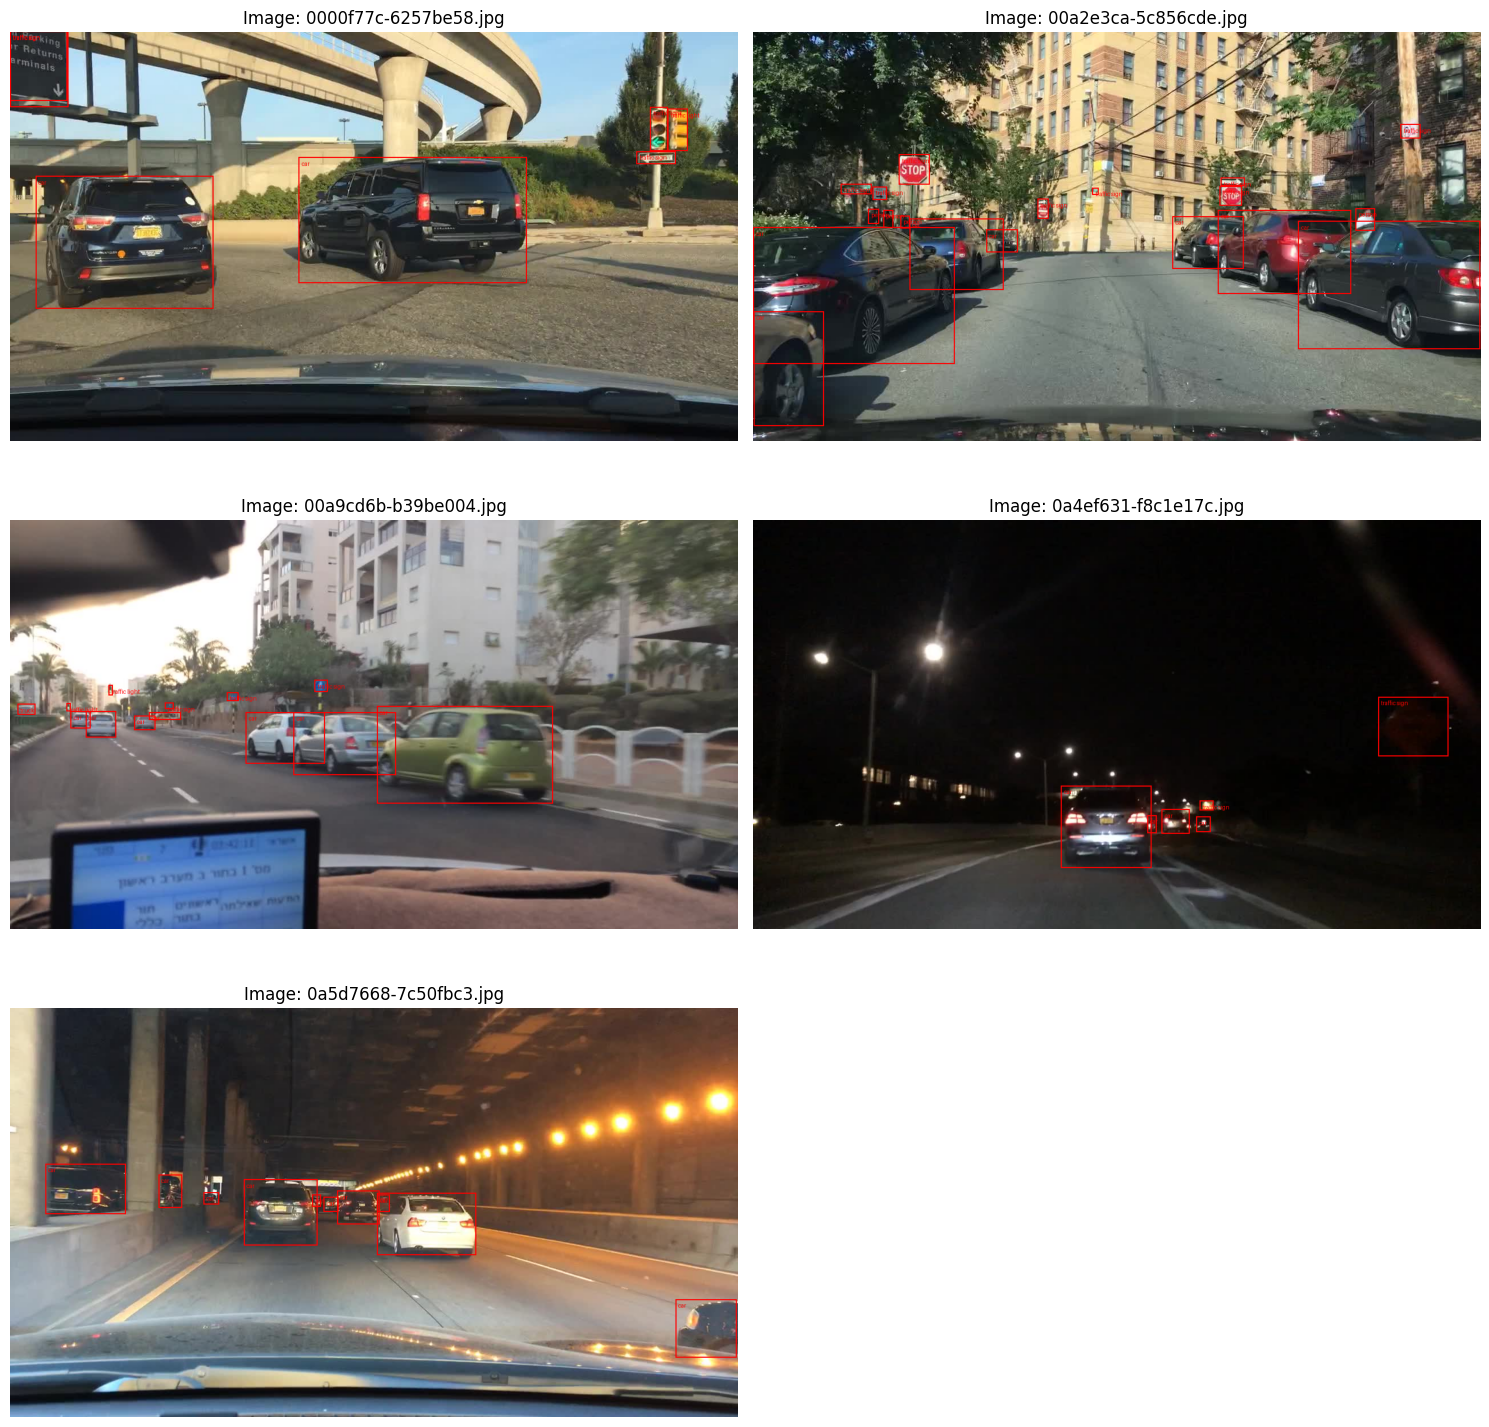

In [ ]:
import os
import json
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# === CONFIG ===
json_path = '/content/drive/MyDrive/Data/labels/bdd100k_labels_images_train.json'  # Update to your file
image_dirs = [
    "/content/drive/MyDrive/Data/Images/train"
]
image_names = [
    "0a5d7668-7c50fbc3.jpg",
    "0000f77c-6257be58.jpg",
    "00a2e3ca-5c856cde.jpg",
    "00a9cd6b-b39be004.jpg",
    "0a4ef631-f8c1e17c.jpg"
]

# === Load Labels ===
with open(json_path, 'r') as f:
    data = json.load(f)

samples = [item for item in data if item['name'] in image_names]

def find_image_path(image_name, directories):
    for directory in directories:
        img_path = os.path.join(directory, image_name)
        if os.path.exists(img_path):
            return img_path
    return None

def show_image_with_boxes(image_path, labels):
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype("arial.ttf", 40)
    except IOError:
        font = ImageFont.load_default()

    for label in labels:
        if 'box2d' not in label:
            continue
        box = label['box2d']
        x1, y1, x2, y2 = box['x1'], box['y1'], box['x2'], box['y2']
        category = label['category']
        draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=2)
        draw.text((x1 + 5, y1 + 5), category, fill='red', font=font)

    return image

if not samples:
    print("No matching image annotations found in the JSON file.")
else:
    plt.figure(figsize=(15, ((len(samples) + 1) // 2) * 5))  # Only one figure created

    for idx, item in enumerate(samples):
        img_name = item['name']
        img_path = find_image_path(img_name, image_dirs)
        if img_path:
            try:
                vis_img = show_image_with_boxes(img_path, item['labels'])
                plt.subplot((len(samples) + 1) // 2, 2, idx + 1)
                plt.imshow(vis_img)
                plt.title(f"Image: {img_name}")
                plt.axis('off')
            except Exception as e:
                print(f"Error processing {img_name}: {e}")
        else:
            print(f"Image file not found: {img_name}")

    plt.tight_layout()
    plt.show()



## Investigate Environmental Diversity:

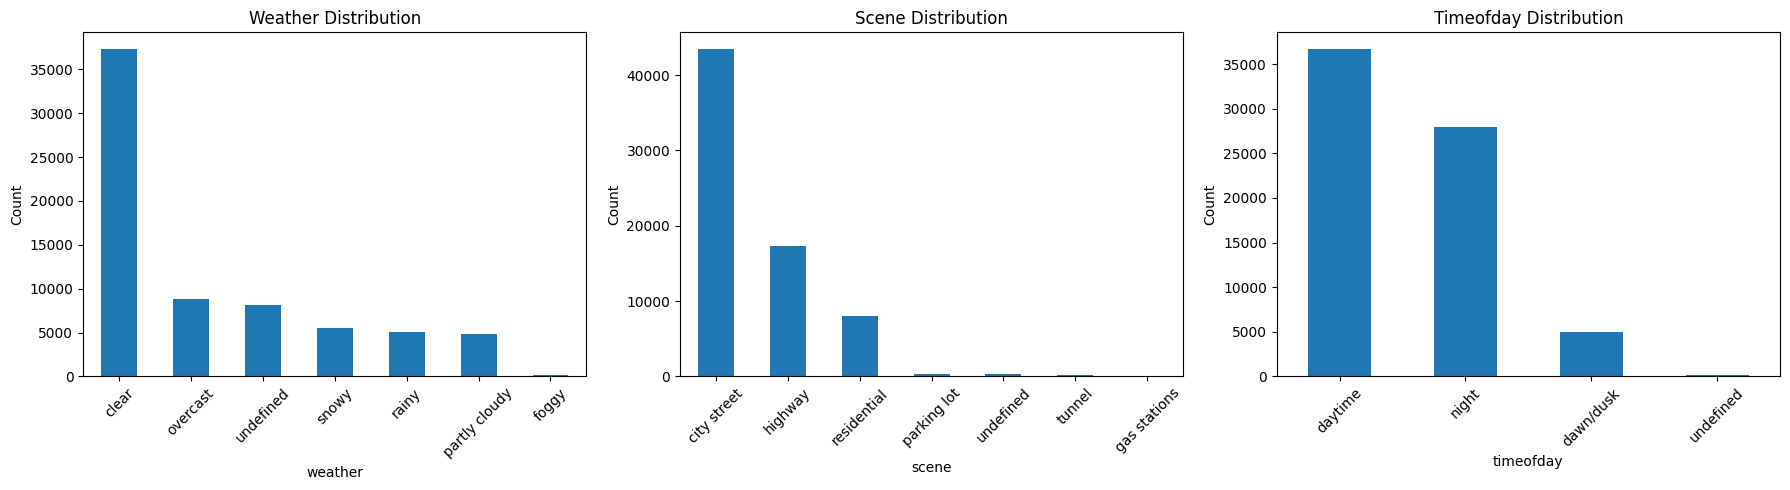

In [ ]:
# Extract environmental attributes
env_data = {
    "weather": [],
    "scene": [],
    "timeofday": []
}

for entry in data:
    attributes = entry["attributes"]
    for key in env_data:
        env_data[key].append(attributes.get(key, "unknown"))

env_df = pd.DataFrame(env_data)

# Plot counts for each environmental factor
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, key in enumerate(env_data):
    env_df[key].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{key.capitalize()} Distribution")
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


## Combine Object Categories with Environmental Context:

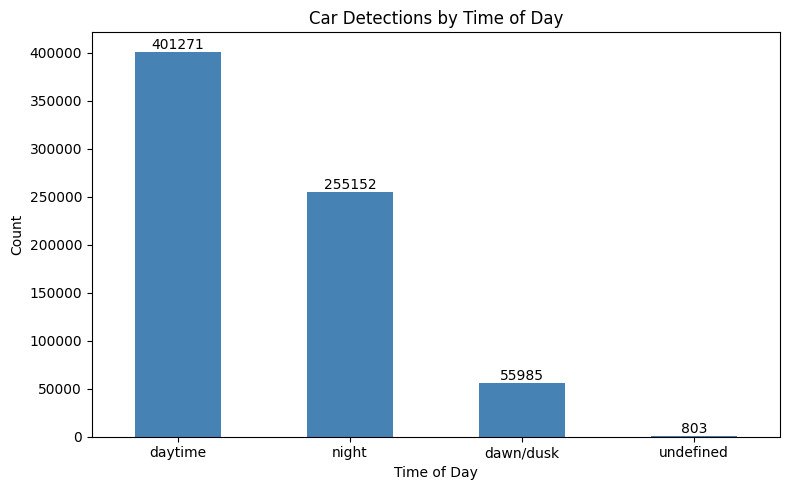

In [ ]:
env_context_records = []

for entry in data:
    attributes = entry.get("attributes", {})
    weather = attributes.get("weather", "unknown")
    scene = attributes.get("scene", "unknown")
    timeofday = attributes.get("timeofday", "unknown")

    for label in entry["labels"]:
        if "box2d" in label:
            env_context_records.append({
                "category": label["category"],
                "weather": weather,
                "scene": scene,
                "timeofday": timeofday
            })

# Now create the DataFrame
df_env_context = pd.DataFrame(env_context_records)

# Example: Check how 'car' detections are distributed by time of day
car_env = df_env_context[df_env_context["category"] == "car"]

plt.figure(figsize=(8, 5))
ax = car_env['timeofday'].value_counts().plot(kind='bar', color='steelblue')

plt.title("Car Detections by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add count labels above bars
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()



## Preprocessing:

### Extractcting the json file of the 10k dataset from the 100k dataset

In [ ]:
import os
import json
import argparse
import sys

def create_subset_json(images_folder, original_json_path, output_json_path):
    """
    Creates a new JSON file containing only the entries for images present in the subset folder.

    Args:
        images_folder (str): Path to the folder containing subset images
        original_json_path (str): Path to the original JSON file
        output_json_path (str): Path where the new subset JSON will be saved
    """
    try:
        # Verify input paths exist and are accessible
        if not os.path.exists(images_folder):
            raise FileNotFoundError(f"Images folder not found: {images_folder}")
        if not os.access(images_folder, os.R_OK):
            raise PermissionError(f"No read permission for images folder: {images_folder}")

        if not os.path.exists(original_json_path):
            raise FileNotFoundError(f"Original JSON file not found: {original_json_path}")
        if not os.access(original_json_path, os.R_OK):
            raise PermissionError(f"No read permission for JSON file: {original_json_path}")

        # Check output directory permissions
        output_dir = os.path.dirname(output_json_path) or '.'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir, exist_ok=True)
        if not os.access(output_dir, os.W_OK):
            raise PermissionError(f"No write permission for output directory: {output_dir}")

        # Get list of image files in the subset folder
        try:
            subset_images = {f for f in os.listdir(images_folder)
                            if os.path.isfile(os.path.join(images_folder, f))}
        except PermissionError:
            raise PermissionError(f"No permission to read files in: {images_folder}")

        # Load the original JSON data
        try:
            with open(original_json_path, 'r') as f:
                original_data = json.load(f)
        except json.JSONDecodeError:
            raise ValueError(f"Invalid JSON format in: {original_json_path}")

        # Filter entries to only include those with images in the subset
        subset_data = [entry for entry in original_data if entry.get('name') in subset_images]

        # Save the subset data to a new JSON file
        try:
            with open(output_json_path, 'w') as f:
                json.dump(subset_data, f, indent=2)
        except PermissionError:
            raise PermissionError(f"No permission to write to: {output_json_path}")

        print(f"Successfully created subset JSON with {len(subset_data)} entries")
        print(f"Output saved to: {os.path.abspath(output_json_path)}")
        return True

    except Exception as e:
        print(f"Error: {str(e)}", file=sys.stderr)
        return False

In [ ]:
'''
create_subset_json("Data/Images/train",
                       "Data/labels/bdd100k_labels_images_train.json",
                       "Data/labels/bdd10k_lables_train.json")
'''

Successfully created subset JSON with 7000 entries
Output saved to: E:\JupNote\ProjectCV\Data\labels\bdd10k_lables_train.json


True

In [ ]:
'''
create_subset_json("/content/drive/MyDrive/Data/Images/val",
                       "/content/drive/MyDrive/Data/labels/bdd100k_labels_images_val.json",
                       "/content/drive/MyDrive/Data/labels/bdd10k_lables_val.json")
'''

Error: Images folder not found: /content/drive/MyDrive/Data/Images/val


False

### Maping format of lables "Converting lables to YOLO compatable format"

In [ ]:
import os
import json
from PIL import Image  # For getting image dimensions

CLASSES = ["car", "rider", "train", "person", "bus", "truck", "bike", "motor", "traffic light", "traffic sign"]
CLASS_MAP = {name: idx for idx, name in enumerate(CLASSES)}

def get_bbox_from_polygon(points):
    x_coords = [pt[0] for pt in points]
    y_coords = [pt[1] for pt in points]
    return [min(x_coords), min(y_coords), max(x_coords), max(y_coords)]

def convert_json_to_yolo(json_dir, output_dir, images_dir=None, default_img_w=1280, default_img_h=720):
    """
    Convert JSON annotations to YOLO format.

    Args:
        json_dir: Path to input JSON file
        output_dir: Directory to save YOLO .txt files
        images_dir: Path to images folder (optional, for getting actual dimensions)
        default_img_w: Default width if image not found (optional)
        default_img_h: Default height if image not found (optional)
    """
    os.makedirs(output_dir, exist_ok=True)

    with open(json_dir, "r", encoding="utf-8") as f:
        data = json.load(f)

    for i, item in enumerate(data):
        image_name = item.get("name", f"image_{i}.jpg")
        base_name = os.path.splitext(image_name)[0]

        # Try to get actual image dimensions if images_dir provided
        img_w, img_h = default_img_w, default_img_h
        if images_dir:
            img_path = os.path.join(images_dir, image_name)
            try:
                with Image.open(img_path) as img:
                    img_w, img_h = img.size
            except (FileNotFoundError, AttributeError):
                print(f"[!] Warning: Could not get dimensions for {image_name}, using defaults")

        labels = item.get("labels", [])

        label_path = os.path.join(output_dir, base_name + ".txt")
        with open(label_path, "w") as out_file:
            for label in labels:
                class_name = label.get("category")
                if not class_name or class_name not in CLASS_MAP:
                    continue

                class_id = CLASS_MAP[class_name]

                # Handle box2d format from your original example
                if "box2d" in label:
                    box = label["box2d"]
                    x1, y1, x2, y2 = box["x1"], box["y1"], box["x2"], box["y2"]
                # Handle poly2d format from your original example
                elif "poly2d" in label:
                    vertices = label["poly2d"][0]["vertices"]
                    x1, y1, x2, y2 = get_bbox_from_polygon(vertices)
                else:
                    continue

                # Normalize to YOLO format
                x_center = ((x1 + x2) / 2) / img_w
                y_center = ((y1 + y2) / 2) / img_h
                width = abs(x2 - x1) / img_w
                height = abs(y2 - y1) / img_h

                # Ensure coordinates are valid
                x_center = max(0, min(1, x_center))
                y_center = max(0, min(1, y_center))
                width = max(0, min(1, width))
                height = max(0, min(1, height))

                out_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    print(f"[✓] Converted {len(data)} image annotations to YOLO format in '{output_dir}'.")

In [ ]:
'''
convert_json_to_yolo(
    json_dir="Data/labels/bdd10k_lables_val.json",
    output_dir="Data/labels/yolo_val",
    images_dir="Data/Images/val"
    )
'''

[✓] Converted 1000 image annotations to YOLO format in '/content/drive/MyDrive/Data/labels/yolo_val'.


### Image resize:

In YOLOv11 (and YOLOv8 from Ultralytics), image resizing and label adjustment **are handled automatically**. When you train or predict, images are resized to the specified size (e.g., 640x640) with letterbox padding to maintain the original aspect ratio. The bounding box labels are also automatically scaled to match the new image size, **so you don't need to adjust them manually.**

### Data Augmentation

In [ ]:
!pip install -q albumentations opencv-python-headless

In [ ]:
''' import os
import cv2
import random
import albumentations as A

# Paths
IMG_DIR = "/content/drive/MyDrive/Data/Images/train"
LABEL_DIR = "/content/drive/MyDrive/Data/labels/train"
OUT_IMG_DIR = "/content/drive/MyDrive/Data/augmented/images/train"
OUT_LABEL_DIR = "/content/drive/MyDrive/Data/augmented/labels/train"

# Create output directories
os.makedirs(OUT_IMG_DIR, exist_ok=True)
os.makedirs(OUT_LABEL_DIR, exist_ok=True)

# Define augmentation
augment = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.2, rotate_limit=30, border_mode=cv2.BORDER_CONSTANT, p=1.0)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Loop through images
for img_file in os.listdir(IMG_DIR):
    if not img_file.endswith(".jpg") and not img_file.endswith(".png"):
        continue

    image_path = os.path.join(IMG_DIR, img_file)
    label_path = os.path.join(LABEL_DIR, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    # Load bounding boxes
    bboxes = []
    class_labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, bw, bh = map(float, parts[1:])
                bboxes.append([x_center, y_center, bw, bh])
                class_labels.append(class_id)

    # Apply augmentation
    augmented = augment(image=image, bboxes=bboxes, class_labels=class_labels)
    aug_img = augmented['image']
    aug_bboxes = augmented['bboxes']
    aug_labels = augmented['class_labels']

    # Save augmented image
    out_img_name = f"aug_{img_file}"
    out_img_path = os.path.join(OUT_IMG_DIR, out_img_name)
    cv2.imwrite(out_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

    # Save corresponding label
    out_label_name = f"aug_{img_file.replace('.jpg', '.txt').replace('.png', '.txt')}"
    out_label_path = os.path.join(OUT_LABEL_DIR, out_label_name)
    with open(out_label_path, 'w') as f:
        for cls_id, box in zip(aug_labels, aug_bboxes):
            f.write(f"{cls_id} {' '.join(f'{x:.6f}' for x in box)}\n") '''

### Merging Augmented data with training data:

In [ ]:
#!cp /content/drive/MyDrive/Data/augmented/images/train/* /content/drive/MyDrive/Data/Images/train/
#!cp /content/drive/MyDrive/Data/augmented/labels/train/* /content/drive/MyDrive/Data/labels/yolo_train/

### Hyperparameters tuning / Model Training:

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.0 MB/s eta 0:00:00


In [ ]:
''' import optuna
import subprocess
import re

def parse_map_from_log(log_path):
    with open(log_path, 'r') as f:
        content = f.read()
    # Look for a line like: "mAP@0.5: 0.713"
    match = re.search(r"mAP@0.5:\s*([\d.]+)", content)
    return float(match.group(1)) if match else 0.0

def objective(trial):
    # Suggested hyperparameters
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    mosaic = trial.suggest_float("mosaic", 0.5, 0.8)
    mixup = trial.suggest_float("mixup", 0.0, 0.2)

    # Unique save dir for each trial
    save_dir = f"/content/drive/MyDrive/Data/runs/train/optuna_trial_{trial.number}"
    log_file = f"{save_dir}/results.txt"

    # Command with all fixed + dynamic parameters
    cmd = f"""
    python train.py \
        --data bdd100k.yaml \
        --cfg yolov11s.yaml \
        --img 640 \
        --batch 32 \
        --epochs 100 \
        --lr {lr} \
        --mosaic {mosaic} \
        --mixup {mixup} \
        --hsv_h 0.015 --hsv_s 0.7 --hsv_v 0.4 \
        --degrees 5.0 --translate 0.1 --scale 0.5 \
        --shear 1.0 --fliplr 0.5 --flipud 0.0 \
        --perspective 0.0005 \
        --project runs/train --name optuna_trial_{trial.number} --exist-ok
    """

    subprocess.run(cmd, shell=True)

    # Read mAP from the results.txt log
    return parse_map_from_log(log_file) '''

In [ ]:
''' study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  # Increase for more tuning '''

' study = optuna.create_study(direction="maximize")\nstudy.optimize(objective, n_trials=10)  # Increase for more tuning '

## Load the Pre-trained model for applying transfer learning and tunnig


#### install ultralytics

In [4]:

!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

## Prepare the data.yaml file for model training

In [ ]:
# Ensure the data directory exists
os.makedirs("data", exist_ok=True)

# Define your custom dataset YAML
custom_yaml = """
train: /content/drive/MyDrive/Data/Images/train
val: /content/drive/MyDrive/Data/Images/val

nc: 10
names: ['bike', 'bus', 'car', 'motor', 'person', 'rider', 'traffic light', 'traffic sign', 'train', 'truck']
"""

# Save to drive
with open("/content/drive/MyDrive/Data/custom.yaml", "w") as f:
    f.write(custom_yaml)

### prepare augmentation parameters in augment.yaml

In [ ]:
# ✅ Step 4: Save Custom Data Augmentation Parameters
augment_yaml = """
augment: True

# Color jittering (simulate lighting/weather variations)
hsv_h: 0.015     # Hue variation
hsv_s: 0.7       # Saturation variation
hsv_v: 0.4       # Brightness variation

# Flipping (simulate camera angles, should avoid flipping traffic signs!)
fliplr: 0.0      # Horizontal flip
flipud: 0.0      # Avoid vertical flipping (not realistic for driving scenes)

mosaic: 0.8      # Combine 4 images into 1 (YOLO trick to improve generalization)
mixup: 0.2       # Blend images/labels (for regularization)
copy_paste: 0.1  # Copy objects from one image into another

scale: 0.5
translate: 0.1
shear: 0.0
perspective: 0.0
rotate: 0.0

"""

with open("/content/drive/MyDrive/Data/augment.yaml", "w") as f:
    f.write(augment_yaml)


## Loading the Pretrained YOLO model

In [6]:
# Load Pretrained Model
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Data/yolov11s.pt')  # Will auto-download weights

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Hyper-parameters Tunning (Evolutionary\)

In [7]:
model.to('cuda')  # Explicitly move model to GPU

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runnin

In [ ]:
# ✅ Run Hyperparameter Evolution
model.tune(
    data='/content/drive/MyDrive/Data/custom.yaml',
    epochs=4,         # Fewer epochs for tuning
    iterations=4,     # Number of tuning trials
    batch=32,         # Smaller batch size for faster tuning
    imgsz=640,
)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune3'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/4 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.0}
ERROR ❌ training failure for hyperparameter tuning iteration 1
Command '['/usr/bin/python3', '-m', 'ultralytics.cfg.__init__', 'train', 'task=detect', 'mode=train', 'model=/content/drive/MyDrive/Data/yolov11s.pt', 'data=/content/drive/MyDrive/Data/custom.yaml', 'epochs=4', 'time=None', 'patience=100', 'batch=32', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=cuda:0', 'workers=8', 'pro

### Generating Best Hyperparameters yaml file resulting from model tuning:



In [8]:
hyp_yaml = """

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
box: 7.5
cls: 0.5
dfl: 1.5
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
bgr: 0.0
mosaic: 1.0
mixup: 0.0
cutmix: 0.0
copy_paste: 0.0

"""

with open("/content/drive/MyDrive/Data/hyp.yaml", "w") as f:
    f.write(hyp_yaml)

### Use the resulting hyper-parameters in model training (with freezing the backbone layers of the model to apply transfer learning)

In [9]:
model.train(
    data='/content/drive/MyDrive/Data/custom.yaml',
    epochs=50,
    imgsz=640,
    batch=64,
    cfg='/content/drive/MyDrive/Data/hyp.yaml',
    workers = 5,
    freeze=10
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=/content/drive/MyDrive/Data/hyp.yaml, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Data/custom.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Data/yolov11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1    823278  ultralytics.nn.modules.head.Detect           [10, [128, 256, 512]]         
YOLO11s summary: 181 layers, 9,431,662 parameters, 9,431,646 gradients, 21.6 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.0.conv.weight'
Freezing layer 'model.0.bn.weight'
Freezing layer 'model.0.bn.bias'
Freezing layer 'model.1.conv.weight'
Freezing layer 'model.1.bn.weight'
Freezing layer 'model.1.bn.bias'
Freezing layer 'model.2.cv1.conv.weight'
Freezing layer 'model.2.cv1.bn.weight'
Freezing layer 'model.2.cv1.bn.bias'
Freezing layer 'model.2.cv2.conv.weight'
Freezing layer 'model.2.cv2.bn.weight'
Freezing layer 'model.2.cv2.bn.bias'
Freezing layer 'model.2.m.0.cv1.conv.weight'
Freezing layer 'model.2.m.0.cv1.bn.weight'
Freezing layer 'model.2.m.0.cv1.bn.bias'
Freezing layer 'model.2.m.0.cv2.conv.weight'
Freezing layer 'mod

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 10.2±21.5 ms, read: 0.3±0.3 MB/s, size: 125.4 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/1rhk6NNcKA55A5H8vj5yTsUOXHX3dHxdb/Data/Images/train.cache... 0 images, 14012 backgrounds, 0 corrupt: 100%|██████████| 14012/14012 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/.shortcut-targets-by-id/1rhk6NNcKA55A5H8vj5yTsUOXHX3dHxdb/Data/Images/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.2±0.1 MB/s, size: 61.2 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1rhk6NNcKA55A5H8vj5yTsUOXHX3dHxdb/Data/Images/val.cache... 0 images, 1006 backgrounds, 0 corrupt: 100%|██████████| 1006/1006 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/drive/.shortcut-targets-by-id/1rhk6NNcKA55A5H8vj5yTsUOXHX3dHxdb/Data/Images/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.23G          0       3318          0          0        640:   2%|▏         | 5/219 [02:35<1:51:10, 31.17s/it]


KeyboardInterrupt: 